In [31]:
!pip install pydotplus

  Stored in directory: C:\Users\Vasu\AppData\Local\pip\Cache\wheels\35\7b\ab\66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib notebook
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
#from IPython.display import image
import graphviz
import pydotplus

In [2]:
iris_df = load_iris()
cols = list(set(list(iris_df.keys())) - set(['DESCR', 'feature_names', 'filename']))
#np.array(iris_df.values()).flatten()
cols
iris_df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
X = iris_df.data
X= pd.DataFrame(X,columns=iris_df.feature_names)
X.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y = pd.DataFrame(iris_df.target)

In [5]:
map_dict = {0:'setosa',1:'versicolor',2:'virginica'}

In [6]:
y.replace(map_dict)

,0
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
5,setosa
6,setosa
7,setosa
8,setosa
9,setosa


In [7]:
missing = X.isna().sum()
missing_prcnt = X.isna().sum()/(X.shape[0])
missing_prcnt_df = pd.DataFrame([missing,missing_prcnt])
missing_prcnt_df
# Checked that there are no NaNs present in the dataset.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0


In [8]:
X['Target'] = y.values
#X = X.loc[:, X.columns!=('Target')]
X.shape

(150, 5)

In [9]:
#check for imbalanced class for the target variables
# Need a dataframe where we can visualize the grouped data using get_group method.
# we can use
X.groupby('Target').size()
# from the result of the size of the grouped target variable it is found that we are not dealing with imbalanced classes.

Target
0    50
1    50
2    50
dtype: int64

In [10]:
#viewing the grouped object using below techniques.
# 1. using groups attribute
X.groupby('Target').groups
#2. Using get_group method to get a data in a dataframe format by providing any one of the keys in the grouped object as given below.
X.groupby('Target').get_group(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2
105,7.6,3.0,6.6,2.1,2
106,4.9,2.5,4.5,1.7,2
107,7.3,2.9,6.3,1.8,2
108,6.7,2.5,5.8,1.8,2
109,7.2,3.6,6.1,2.5,2


In [11]:
#some statistical tools for viewing
#1. correlation with each feature (Corrwith attribute is used to compurte correlation with two different dataframes whereas
# corr attribute involves, for differen classes the correlation must be zeros since they are different the correlation must be 0)

In [12]:
X.groupby('Target').get_group(0).corrwith(X.groupby('Target').get_group(1))


sepal length (cm)   NaN
sepal width (cm)    NaN
petal length (cm)   NaN
petal width (cm)    NaN
Target              NaN
dtype: float64

In [13]:
#X_0 = X.groupby('Target').get_group(0)
#X_1 = X.groupby('Target').get_group(1)
#X_2 = X.groupby('Target').get_group(2)
#X_0.corrwith(X_1)

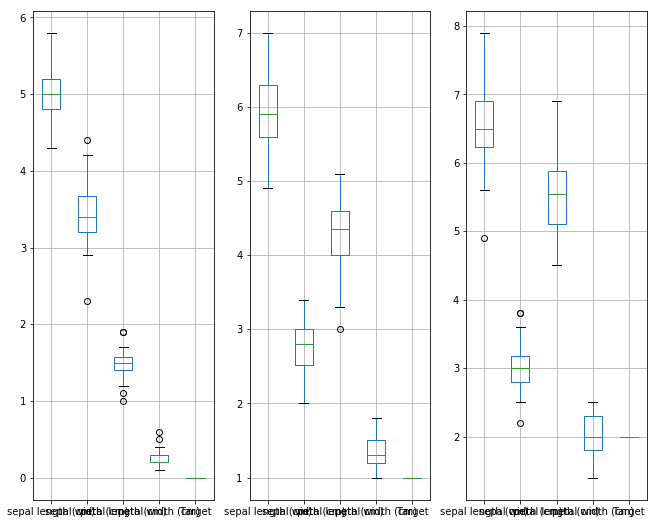

In [14]:
#2. Detecting outliers using boxplots
#plt.subplots(1,len(list(X['Target'].unique())),figsize=(5,5))
fig = plt.figure(figsize=(11,9))
for i,ele in enumerate(X['Target'].unique()):
    ax  = plt.subplot(1,3,i+1);
    X.groupby('Target').get_group(ele).boxplot();

In [15]:
X = X.loc[:, X.columns!=('Target')]


In [16]:
#Analyzing which model can be used to predict the data.
# 1. SVM can be used as the number of features less than 50
# 2. Decision Trees can also be used as the
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)
clf = DecisionTreeClassifier().fit(X_train,y_train)
clf.predict(X_test)

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

In [17]:
list(iris_df.target_names)

['setosa', 'versicolor', 'virginica']

In [44]:
#dot_data = StringIO()
#data = export_graphviz(clf,out_file=dot_data,\
#                      filled=True,rounded=True,special_characters=True)
data = export_graphviz(clf,out_file=None,feature_names=iris_df.feature_names,class_names=iris_df.target_names,\
                      filled=True,rounded=True,special_characters=True)

#graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) - not needed
#Image(graph.create_png()) - Not needed
graph = graphviz.Source(data)
graph.render(filename='first_attempt')

'first_attempt.pdf'